<a href="https://colab.research.google.com/github/nawafalnaqbi/FDS/blob/main/Activity2_questions_Nawaf_Alnaqbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [69]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [70]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [72]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [73]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [74]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-74-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [75]:
#merged_data.dtypes

In [76]:
pollution_data = merged_data[['pm10','neighborhood']]

In [77]:
pollution_data.shape[0]

118495

In [78]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [79]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [80]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [81]:
pollution_data['pm10'].min()

0.0

In [82]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [83]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [84]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [85]:
pollution_data = merged_data[['pm10','neighborhood']]
joined_table = Table().from_df(pollution_data)

In [159]:
#Display the first 5 rows of the joined_table using .show().
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [151]:
#Print the number of rows and columns in the table.
print("Number of rows: ", joined_table.num_rows)
print("Number of columns ", joined_table.num_columns)

Number of rows:  118495
Number of columns  2


In [223]:
#Identify any missing values in the table and handle them appropriately
for label in joined_table.labels:
    missing_count = joined_table.where(label, None).num_rows
    print("Column: " , label , " has ", missing_count, " missing value(s).")

Column:  pm10  has  115627  missing value(s).
Column:  neighborhood  has  118495  missing value(s).


In [224]:
#(e.g., drop rows with missing values or fill them with a default value).
# Update each column by replacing None with 0 using with_column.

# Create a copy so the original table remains unchanged.
filled_table = joined_table.copy()

# For each column, replace missing values (None or np.nan) with 0.
for label in joined_table.labels:
    new_values = filled_table.apply(
        lambda x: 0 if (x is None or (isinstance(x, float) and np.isnan(x))) else x,
        label
    )
    filled_table = filled_table.with_column(label, new_values)

# Check the missing values after replacement by counting both None and np.nan.
for label in filled_table.labels:
    missing_count = sum(
        1 for x in filled_table.column(label)
        if (x is None or (isinstance(x, float) and np.isnan(x)))
    )
    print(f"Column '{label}' has {missing_count} missing value(s).")


Column 'pm10' has 0 missing value(s).
Column 'neighborhood' has 0 missing value(s).


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [225]:
# add all needed columns inside the merged_data list
pollution_data_statistics = merged_data[['temperature', 'humidity', 'pm25']]
joined_table_statistics = Table().from_df(pollution_data_statistics)

In [228]:
#Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply()

# List of attributes to summarize.
attributes = ["temperature", "humidity", "pm25"]

# Using list comprehensions to compute statistics.
attr_col   = attributes
mean_col   = [np.mean(joined_table_statistics.apply(lambda x: float(x), attr)) for attr in attributes]
median_col = [np.median(joined_table_statistics.apply(lambda x: float(x), attr)) for attr in attributes]
min_col    = [min(joined_table_statistics.apply(lambda x: float(x), attr)) for attr in attributes]
max_col    = [max(joined_table_statistics.apply(lambda x: float(x), attr)) for attr in attributes]

# Construct the summary table using with_columns().
summary_table = Table().with_columns(
    "Attribute", attr_col,
    "Mean", mean_col,
    "Median", median_col,
    "Min", min_col,
    "Max", max_col
)

# Display the summary table.
summary_table.show()



Attribute,Mean,Median,Min,Max
temperature,8.24158,7.2,-7.9,10471
humidity,50.1549,46.2,0,104.2
pm25,7.37452,3.02,0,3267.02


In [246]:
# add all needed columns inside the merged_data list
pollution_data_borough_pm25 = merged_data[['pm25', 'borough']]
joined_table_borough_pm25  = Table().from_df(pollution_data_borough_pm25)

In [247]:
#Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
avg_pm25_by_borough = joined_table_borough_pm25.group("borough", np.mean)
#Display the results in a new table.
avg_pm25_by_borough.show()

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

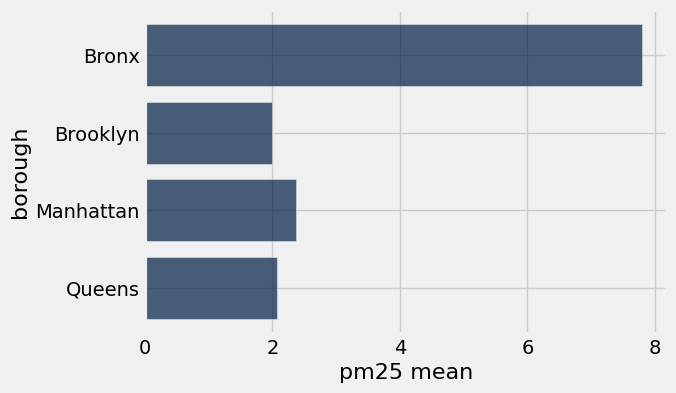

In [254]:
#Create a bar chart showing the average pm25 levels for each borough using .barh().
avg_pm25_by_borough.barh("borough", "pm25 mean")

Text(0.5, 1.0, 'Temperature vs. PM2.5')

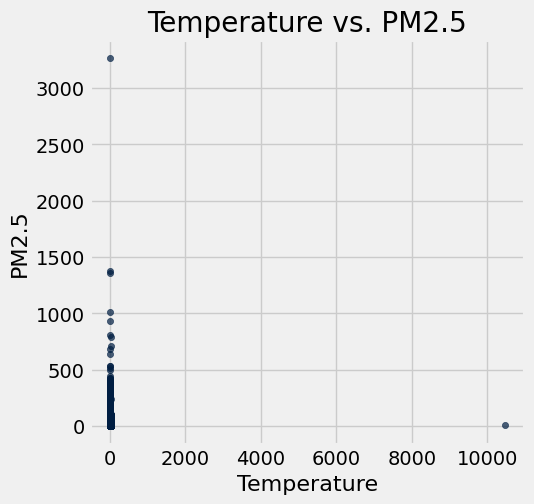

In [276]:
#Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter().
#Add appropriate labels and a title to the plot.

# add all needed columns inside the merged_data list
pollution_data_temperature_pm25 = merged_data[['temperature', 'pm25']]
joined_table_temperature_pm25  = Table().from_df(pollution_data_temperature_pm25)

joined_table_temperature_pm25.scatter("temperature", "pm25")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.title("Temperature vs. PM2.5")

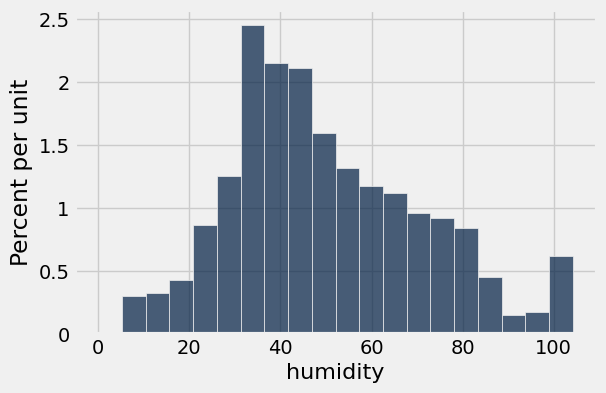

In [281]:
#Create a histogram of humidity values across all neighborhoods using .hist().
# add all needed columns inside the merged_data list
pollution_data_humidity = merged_data[['humidity']]
joined_table_humidity  = Table().from_df(pollution_data_humidity)
joined_table_humidity.hist("humidity", bins=20)

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [283]:
#Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows: "Good" if pm25 < 12 "Moderate" if 12 <= pm25 < 35 "Unhealthy" if pm25 >= 35
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"


In [286]:
#Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
#Count the number of sensors in each PM2.5 category and display the results using .group().
pollution_pm25_category = merged_data[['pm25']]
joined_table_pm25_category = Table().from_df(pollution_pm25_category)

pm25_categories = joined_table_pm25_category.apply(calculate_pm25_category, "pm25")

# Add the new column "PM25_Category" to the table.
joined_table_with_category = joined_table.with_column("PM25_Category", pm25_categories)

# Group the data by PM25_Category and count the number of sensors in each category.
# Here, np.size is used as the aggregation function.
category_counts = joined_table_with_category.group("PM25_Category", np.size)

# Display the results.
category_counts.show()


PM25_Category,pm10 size,neighborhood size
Good,101851,101851
Moderate,12651,12651
Unhealthy,3993,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

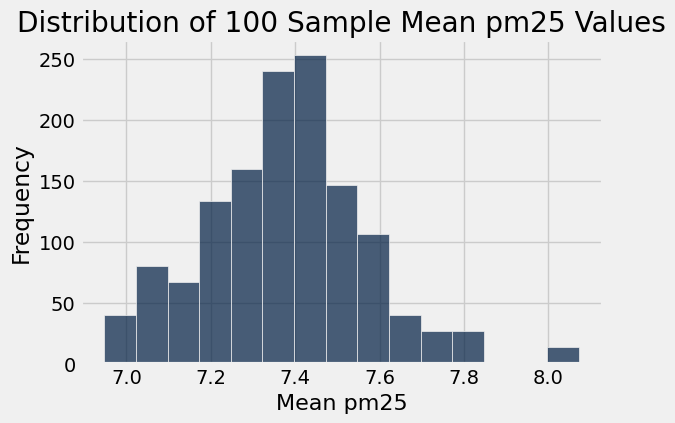

In [313]:
# Determine the number of rows to sample (10% of the total rows)
sample_size = int(joined_table_pm25_category.num_rows * 0.1)

# List to store the mean pm25 from each sampled iteration
sample_means = []

# Repeat the random sampling process 100 times
for _ in range(100):
    # Randomly sample 10% of the rows without replacement using .sample()
    sample_table = joined_table_pm25_category.sample(sample_size)

    # Calculate the mean of the 'pm25' column in the sample
    mean_pm25 = np.mean(sample_table.column('pm25'))
    sample_means.append(mean_pm25)

# Create a new Table from the sample means
means_table = Table().with_column('mean_pm25', sample_means)

# Plot a histogram of the sample means using the table's .hist() method
means_table.hist('mean_pm25', bins=15)

# Add title and labels using matplotlib
plt.title('Distribution of 100 Sample Mean pm25 Values')
plt.xlabel('Mean pm25')
plt.ylabel('Frequency')
plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.